In [2]:
# подключаем библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
%config InlineBackend.figure_formats = ['svg']

In [3]:
colors = ['#de3838', '#007bc3', '#ffd12a']
markers = ['o', 'x', ',']

def plot_pca(X_pca, y):
    for l, c, m, in zip(np.unique(y), colors, markers):
        plt.scatter(X_pca[y==l, 0], X_pca[y==l, 1],
                    c=c, marker=m, label=l)

    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()
    plt.show()

In [4]:
from sklearn.datasets import load_wine

wine = load_wine() 
df_wine = pd.DataFrame(wine.data, columns=wine.feature_names)
df_wine['class'] = wine.target
df_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [5]:
# масшабируем данные
from sklearn.preprocessing import StandardScaler

X = df_wine.iloc[:, :-1].values 
y = df_wine.iloc[:, -1].values  

sc = StandardScaler()
X_std = sc.fit_transform(X)

In [6]:
# строим ковариационную матрицу
cov_mat = np.cov(X_std.T)

# находим собственные вектора и собственные значения
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]

eigen_pairs.sort(key=lambda k: k[0], reverse=True)

w1 = eigen_pairs[0][1]
w2 = eigen_pairs[1][1]

In [7]:
W = np.stack([w1, w2], axis=1)
X_pca = X_std @ W

X_pca

array([[-3.31675081,  1.44346263],
       [-2.20946492, -0.33339289],
       [-2.51674015,  1.0311513 ],
       [-3.75706561,  2.75637191],
       [-1.00890849,  0.86983082],
       [-3.05025392,  2.12240111],
       [-2.44908967,  1.17485013],
       [-2.05943687,  1.60896307],
       [-2.5108743 ,  0.91807096],
       [-2.75362819,  0.78943767],
       [-3.47973668,  1.30233324],
       [-1.7547529 ,  0.61197723],
       [-2.11346234,  0.67570634],
       [-3.45815682,  1.13062988],
       [-4.31278391,  2.09597558],
       [-2.3051882 ,  1.66255173],
       [-2.17195527,  2.32730534],
       [-1.89897118,  1.63136888],
       [-3.54198508,  2.51834367],
       [-2.0845222 ,  1.06113799],
       [-3.12440254,  0.78689711],
       [-1.08657007,  0.24174355],
       [-2.53522408, -0.09184062],
       [-1.64498834, -0.51627893],
       [-1.76157587, -0.31714893],
       [-0.9900791 ,  0.94066734],
       [-1.77527763,  0.68617513],
       [-1.23542396, -0.08980704],
       [-2.18840633,

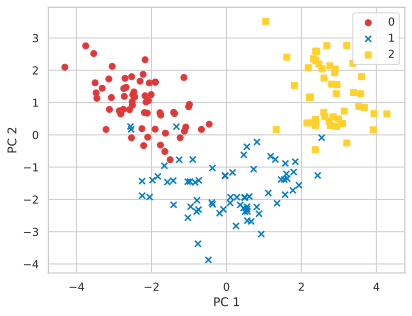

In [8]:
plot_pca(X_pca, y)

In [9]:
# сразу подключаем PCA метод
from sklearn.decomposition import PCA

X_pca = PCA(n_components=2, random_state=42).fit_transform(X_std) 

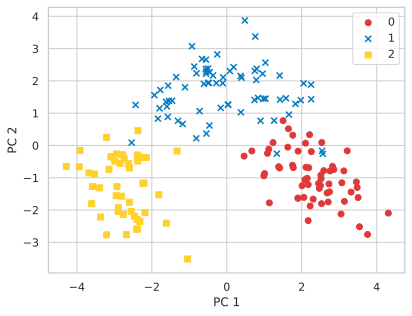

In [10]:
plot_pca(X_pca, y)